https://stepik.org/lesson/1576183/step/5

In [ ]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim

class FuncModel(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.layer = nn.Linear(in_features, 1)

    def forward(self, x):
        return self.layer(x)


torch.manual_seed(1)

epochs = 20     # число эпох обучения
batch_size = 8  # размер батча
N = 6           # порядок модели (N-1)

# формирование обучающей выборки (значений функции)
data_x = torch.arange(-4, 4, 0.01)
data_y = 0.1 * data_x + 0.1 * data_x ** 2 - 0.5 * torch.sin(2 * data_x) + torch.cos(4 * data_x)
data_x.unsqueeze_(-1)
X = torch.cat([data_x ** _n for _n in range(N)], dim=1)
ds = data.TensorDataset(X, data_y)

d_train, d_val = data.random_split(ds, [0.8, 0.2])
train_data = data.DataLoader(d_train, batch_size=batch_size, shuffle=True)
train_data_val = data.DataLoader(d_val, batch_size=len(d_val), shuffle=False)

# Модель
model = FuncModel(N)

# Оптимизатор RMSprop и функция потерь MSELoss
optimizer = optim.RMSprop(params=model.parameters(), weight_decay=10, lr=0.01)
loss_func = nn.MSELoss()

loss_lst_val = []   # список значений потерь при валидации
loss_lst = []       # список значений потерь при обучении

for _e in range(epochs):
    model.train()
    loss_mean = 0
    lm_count = 0

    for x_train, y_train in train_data:
        predict = model(x_train).squeeze() # прогноз модели для x_train
        loss = loss_func(predict, y_train) # вычислите потери для predict и y_train

        # шаг обучения (градиентного спуска)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        lm_count += 1
        loss_mean = 1 / lm_count * loss.item() + (1 - 1 / lm_count) * loss_mean

    # валидация модели
    model.eval()
    x_val, y_val = next(iter(train_data_val))
    with torch.no_grad():
        p = model(x_val).squeeze()
        loss = loss_func(p, y_val)
        Q_val = loss.item()

    loss_lst.append(loss_mean)
    loss_lst_val.append(Q_val)

model.eval()
p = model(X).squeeze()
Q = loss_func(p, data_y).item()

# print(Q)
# print(loss_lst)
# print(loss_lst_val)

0.6522688269615173
[120.31309643685823, 3.3026121832430375, 2.4935652166605, 4.078188475593923, 3.2156154341995715, 6.914098999090495, 4.886172919720411, 4.445474632084369, 7.9994204670190845, 2.468399145454167, 6.484978445060549, 3.7335609614849075, 7.332498326152562, 4.996889413893224, 3.927759433537722, 7.546773806959391, 3.177890228480101, 9.354853989556428, 1.242343152686953, 5.675460565090183]
[4.715259552001953, 2.296558380126953, 3.298448085784912, 1.2215008735656738, 1.2966734170913696, 3.5070271492004395, 2.552272319793701, 14.188924789428711, 0.8527407646179199, 0.6413101553916931, 0.6548911929130554, 0.8109663724899292, 1.4376513957977295, 0.9345694780349731, 12.268247604370117, 48.648719787597656, 3.775141477584839, 1.3926925659179688, 0.745885968208313, 0.6655020117759705]


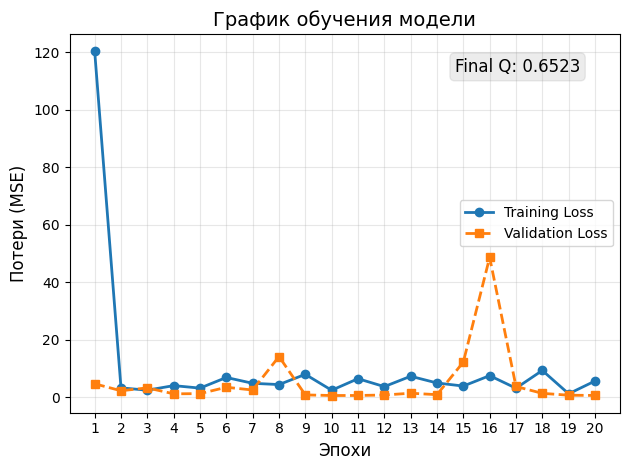

In [ ]:
# График
import matplotlib.pyplot as plt

plt.plot(loss_lst, label='Training Loss', marker='o', linestyle='-', linewidth=2)
plt.plot(loss_lst_val, label='Validation Loss', marker='s', linestyle='--', linewidth=2)
plt.title('График обучения модели', fontsize=14)
plt.xlabel('Эпохи', fontsize=12)
plt.ylabel('Потери (MSE)', fontsize=12)
plt.xticks(range(epochs), range(1, epochs+1))  # Нумерация эпох с 1
plt.grid(True, alpha=0.3)
plt.legend()

# Аннотация с итоговой ошибкой
plt.annotate(f'Final Q: {Q:.4f}',
             xy=(0.7, 0.9),
             xycoords='axes fraction',
             fontsize=12,
             bbox=dict(boxstyle="round", alpha=0.15, color='gray'))

plt.tight_layout()
plt.show()